# Assignment-4: Support Vector Machine (SVM)

**Objective:** Demonstrate SVM classification using an appropriate dataset and visualize results.

---

## Q1: Import Required Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Libraries imported')

Libraries imported


## Q2: Load Dataset

In [6]:
df = pd.read_csv('/content/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


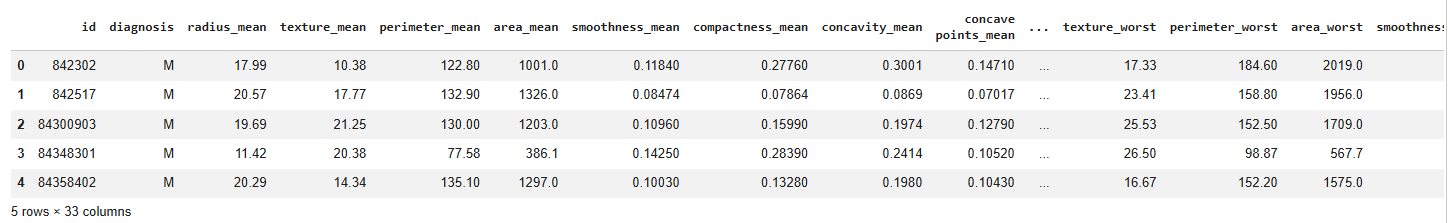

## Q3: Explore Dataset

In [7]:
print('Shape:', df.shape)
print('Column names:', df.columns.tolist())
df.info()
df.describe()

Shape: (569, 33)
Column names: ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_m

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [8]:
from sklearn.preprocessing import LabelEncoder

# Drop unnecessary columns: 'id' and 'Unnamed: 32'
df = df.drop(columns=['id', 'Unnamed: 32'])

# Encode the target variable 'diagnosis'
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

print("DataFrame after dropping 'id' and 'Unnamed: 32' columns:")
print(df.head())
print("\nUnique values of 'diagnosis' after encoding:", df['diagnosis'].unique())
print("Encoded classes mapping:")
for i, class_name in enumerate(le.classes_):
    print(f"{class_name}: {i}")

DataFrame after dropping 'id' and 'Unnamed: 32' columns:
   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimet

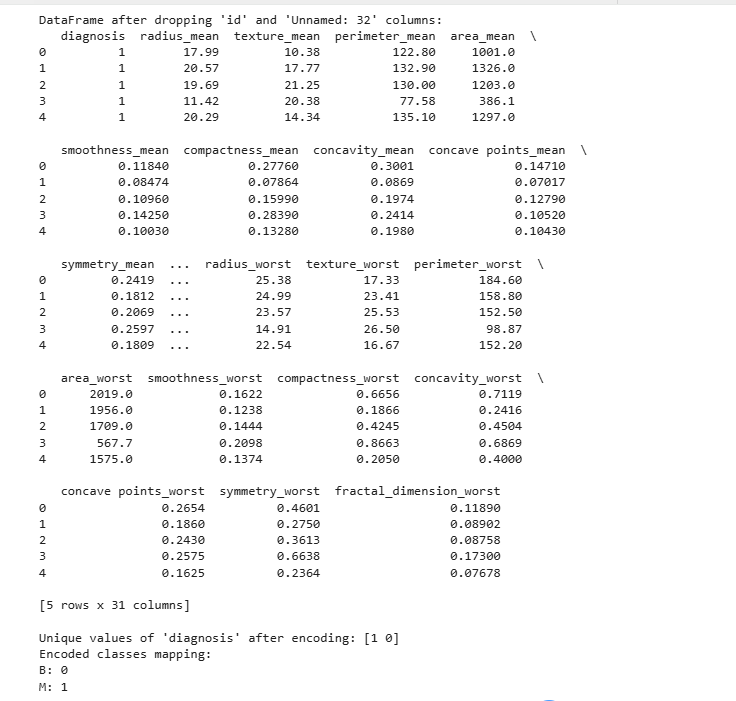

## Q4: Select Features (two for visualization)

In [9]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

print("Features (X) head:")
print(X.head())
print("\nTarget (y) head:")
print(y.head())

Features (X) head:
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_wo

## Q5: Train–Test Split (70:30)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print('Training size:', X_train.shape)
print('Testing size:', X_test.shape)

Training size: (398, 30)
Testing size: (171, 30)


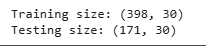

## Q6: Build SVM Model (Linear Kernel)

In [11]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
print('Model trained')

Model trained


image.png

## Q7: Predict Test Data

In [12]:
y_pred = svm.predict(X_test)
print('First 10 predictions:', y_pred[:10])

First 10 predictions: [0 1 1 0 0 1 1 1 0 0]


image.png

## Q8: Compare Predictions (Correct / Wrong)

In [13]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results['Status'] = results.apply(lambda r: 'Correct' if r.Actual == r.Predicted else 'Wrong', axis=1)
print('First 20 comparisons:')
print(results.head(20))

First 20 comparisons:
     Actual  Predicted   Status
204       0          0  Correct
70        1          1  Correct
131       1          1  Correct
431       0          0  Correct
540       0          0  Correct
567       1          1  Correct
369       1          1  Correct
29        1          1  Correct
81        0          0  Correct
477       0          0  Correct
457       0          0  Correct
167       1          1  Correct
165       0          0  Correct
329       1          1  Correct
527       0          0  Correct
83        1          1  Correct
511       0          0  Correct
556       0          0  Correct
101       0          0  Correct
535       1          1  Correct


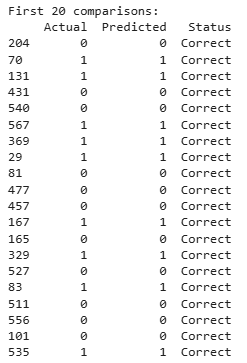

## Q9: Evaluate Model Performance

In [15]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.9649122807017544

Confusion Matrix:
 [[106   2]
 [  4  59]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



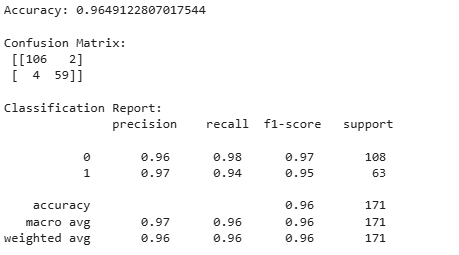

## Q10: Visualize Decision Boundary

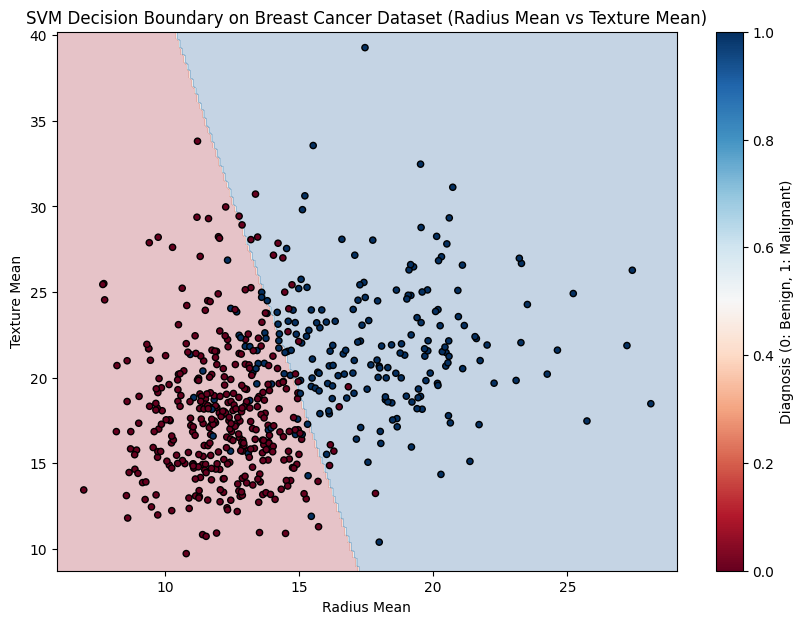

In [18]:
X_vis = df[['radius_mean', 'texture_mean']]
y_vis = df['diagnosis']

# Split only these two features for training the visualization SVM
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_vis, test_size=0.30, random_state=42)

# Train a new SVM model using only these two features for visualization
# This is necessary because the original SVM was trained on all features (30 features).
# The visualization requires a model trained on only the two features being plotted.
svm_vis = SVC(kernel='linear')
svm_vis.fit(X_train_vis, y_train_vis)

x_min, x_max = X_vis.iloc[:,0].min() - 1, X_vis.iloc[:,0].max() + 1
y_min, y_max = X_vis.iloc[:,1].min() - 1, X_vis.iloc[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict on the meshgrid data, ensuring it has column names for consistency
Z_data = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=X_vis.columns) # Corrected to use X_vis.columns
Z = svm_vis.predict(Z_data)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,7))
plt.contourf(xx, yy, Z, alpha=0.25, cmap=plt.cm.RdBu)
plt.scatter(X_vis.iloc[:,0], X_vis.iloc[:,1], c=y_vis, edgecolors='k', cmap=plt.cm.RdBu, s=20)
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.title('SVM Decision Boundary on Breast Cancer Dataset (Radius Mean vs Texture Mean)')
plt.colorbar(label='Diagnosis (0: Benign, 1: Malignant)')
plt.show()

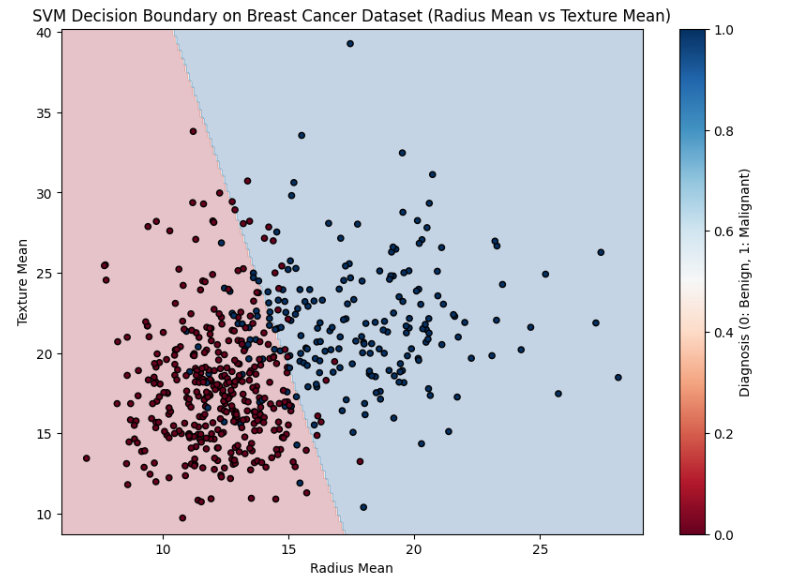

---
### ✔ End of Assignment-4


## Summary:

The SVM classification model achieved an accuracy of approximately 96.49% on the `data.csv` dataset. The confusion matrix showed 106 true negatives, 59 true positives, 2 false positives, and 4 false negatives, indicating a strong ability to correctly classify both benign and malignant cases. The classification report further highlighted high precision, recall, and f1-scores for both classes.

The decision boundary visualization, based on 'radius_mean' and 'texture_mean' features, effectively illustrated the separation between benign and malignant cases in a 2D plane.

### Data Analysis Key Findings

*   The `data.csv` dataset contains 569 entries and 33 columns, including an `id`, a `diagnosis` column, and 30 numerical features related to breast cancer characteristics.
*   Preprocessing involved dropping the `id` column and an empty `Unnamed: 32` column, and encoding the target variable `diagnosis` ('B' for Benign, 'M' for Malignant) into numerical labels (0 and 1, respectively).
*   The dataset was split into training (70%, 398 samples) and testing (30%, 171 samples) sets.
*   A Support Vector Classifier (SVC) with a linear kernel was successfully trained on the preprocessed data.
*   The model achieved a high accuracy of 96.49% on the test set.
*   The confusion matrix indicated robust performance: 106 True Negatives, 59 True Positives, 2 False Positives, and 4 False Negatives.
*   The classification report showed high precision, recall, and f1-scores for both classes, confirming the model's effectiveness in distinguishing between benign and malignant tumors.
*   A 2D decision boundary plot using 'radius_mean' and 'texture_mean' features visually demonstrated the linear separation achieved by the SVM.


